# Supervised classification

In the data.csv there are letters (uppercases and lowercases) and numbers, 28x28 pixels in a row format.

* First, you need to know which labels are which, meaning you need to visualize some data to realize which number labels represents a letter, or a number.

In [61]:
# Import libraries
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as DTC # Árbol Decisión
from sklearn.ensemble import RandomForestClassifier as RFC # Random Forest
from sklearn.svm import SVC # Máquinas de Soporte Vectorial Classifier
#from sklearn.naive_bayes import GaussianNB as GNB #Naive Bayes Gauss
from sklearn.naive_bayes import BernoulliNB as BNB # Naive Bayes Bernoulli
from sklearn.neighbors import KNeighborsClassifier as KNNC # K-Nearest Neighbors

import warnings
warnings.simplefilter('ignore')

In [8]:
# Your code here
zf=zipfile.ZipFile('data_all.zip')
data=pd.read_csv(zf.open('data_all.csv'))
data.shape

(116322, 785)

In [9]:
data.head()

,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


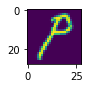

In [44]:
plt.figure(figsize = (1,1))
plt.imshow(matriz_datos[90000,1:].reshape(28,28))
plt.show()

In [55]:
dataupper = data[(data.e >=10) & (data.e <=35)]
Xupper = dataupper.drop('e', axis = 1)
yupper = dataupper.e
X_train_upper, X_test_upper, y_train_upper, y_test_upper = train_test_split(Xupper, yupper, test_size = 0.1)

* Now, try to train a classifier model to predict the uppercases. Use every single model you know for classification.

In [56]:
# Árbol Decisión
dtcupper = DTC()
dtcupper.fit(X_train_upper, y_train_upper)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [57]:
train_score_dtcupper_=dtcupper.score(X_train_upper, y_train_upper)
test_score_dtcupper_=dtcupper.score(X_test_upper, y_test_upper)
print (train_score_dtcupper_, test_score_dtcupper_)

1.0 0.748006379585327


In [62]:
# Random Forest
rfcupper = RFC()
rfcupper.fit(X_train_upper, y_train_upper)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [63]:
train_score_rfcupper_=rfcupper.score(X_train_upper, y_train_upper)
test_score_rfcupper_=rfcupper.score(X_test_upper, y_test_upper)
print (train_score_rfcupper_, test_score_rfcupper_)

0.9979085430698333 0.8724082934609251


In [64]:
# Máquinas de Soporte Vectorial Classifier
svcupper = SVC()
svcupper.fit(X_train_upper, y_train_upper)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [66]:
train_score_svcupper_=svcupper.score(X_train_upper, y_train_upper)
test_score_svcupper_=svcupper.score(X_test_upper, y_test_upper)
print (train_score_svcupper_, test_score_svcupper_)

1.0 0.13046251993620414


In [67]:
# Naive Bayes Bernoulli
bnbupper = BNB()
bnbupper.fit(X_train_upper, y_train_upper)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [68]:
train_score_bnbupper_=bnbupper.score(X_train_upper, y_train_upper)
test_score_bnbupper_=bnbupper.score(X_test_upper, y_test_upper)
print (train_score_bnbupper_, test_score_bnbupper_)

0.6958170861396668 0.6992025518341308


In [69]:
# NK-Nearest Neighbors
knncupper = KNNC()
knncupper.fit(X_train_upper, y_train_upper)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [70]:
train_score_knncupper_=knncupper.score(X_train_upper, y_train_upper)
test_score_knncupper_=knncupper.score(X_test_upper, y_test_upper)
print (train_score_knncupper_, test_score_knncupper_)

0.9207373271889401 0.8928229665071771


* Try to do the same thing with lowercases.

In [71]:
# Your code here
datalower = data[(data.e >=36) & (data.e <=61)]
Xlower = datalower.drop('e', axis = 1)
ylower = datalower.e
X_train_lower, X_test_lower, y_train_lower, y_test_lower = train_test_split(Xlower, ylower, test_size = 0.1)

In [78]:
# Árbol Decisión
dtclower = DTC()
dtclower.fit(X_train_lower, y_train_lower)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [79]:
train_score_dtclower_=dtclower.score(X_train_lower, y_train_lower)
test_score_dtclower_=dtclower.score(X_test_lower, y_test_lower)
print (train_score_dtclower_, test_score_dtclower_)

1.0 0.7272727272727273


In [80]:
# Random Forest
rfclower = RFC()
rfclower.fit(X_train_lower, y_train_lower)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [81]:
train_score_rfclower_=rfclower.score(X_train_lower, y_train_lower)
test_score_rfclower_=rfclower.score(X_test_lower, y_test_lower)
print (train_score_rfclower_, test_score_rfclower_)

0.9975362378351743 0.8392461197339246


In [90]:
# Máquinas de Soporte Vectorial Classifier
svclower = SVC()
svclower.fit(X_train_lower, y_train_lower)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [91]:
train_score_svclower_=svclower.score(X_train_lower, y_train_lower)
test_score_svclower_=svclower.score(X_test_lower, y_test_lower)
print (train_score_svclower_, test_score_svclower_)

1.0 0.15262379896526237


In [82]:
# Naive Bayes Bernoulli
bnblower = BNB()
bnblower.fit(X_train_lower, y_train_lower)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [83]:
train_score_bnblower_=bnblower.score(X_train_lower, y_train_lower)
test_score_bnblower_=bnblower.score(X_test_lower, y_test_lower)
print (train_score_bnblower_, test_score_bnblower_)

0.642302796370057 0.6382113821138211


In [92]:
# NK-Nearest Neighbors
knnclower = KNNC()
knnclower.fit(X_train_lower, y_train_lower)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [93]:
train_score_knnclower_=knnclower.score(X_train_lower, y_train_lower)
test_score_knnclower_=knnclower.score(X_test_lower, y_test_lower)
print (train_score_knnclower_, test_score_knnclower_)

0.9050630312487168 0.8628972653362897


* Try to do the same thing with numbers.

In [75]:
# Your code here
datanum = data[data.e <=9]
Xnum = datanum.drop('e', axis = 1)
ynum = datanum.e
X_train_num, X_test_num, y_train_num, y_test_num = train_test_split(Xnum, ynum, test_size = 0.1)

In [84]:
# Árbol Decisión
dtcnum = DTC()
dtcnum.fit(X_train_num, y_train_num)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [85]:
train_score_dtcnum_=dtcnum.score(X_train_num, y_train_num)
test_score_dtcnum_=dtcnum.score(X_test_num, y_test_num)
print (train_score_dtcnum_, test_score_dtcnum_)

1.0 0.8933011049723757


In [86]:
# Random Forest
rfcnum = RFC()
rfcnum.fit(X_train_num, y_train_num)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [87]:
train_score_rfcnum_=rfcnum.score(X_train_num, y_train_num)
test_score_rfcnum_=rfcnum.score(X_test_num, y_test_num)
print (train_score_rfcnum_, test_score_rfcnum_)

0.9992518129148601 0.9573549723756906


In [ ]:
# Máquinas de Soporte Vectorial Classifier
svcnum = SVC()
svcnum.fit(X_train_num, y_train_num)

In [ ]:
train_score_svcnum_=svcnum.score(X_train_num, y_train_num)
test_score_svcnum_=svcnum.score(X_test_num, y_test_num)
print (train_score_svcnum_, test_score_svcnum_)

In [88]:
# Naive Bayes Bernoulli
bnbnum = BNB()
bnbnum.fit(X_train_num, y_train_num)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [89]:
train_score_bnbnum_=bnbnum.score(X_train_num, y_train_num)
test_score_bnbnum_=bnbnum.score(X_test_num, y_test_num)
print (train_score_bnbnum_, test_score_bnbnum_)

0.8231017150750105 0.8209599447513812


In [ ]:
# NK-Nearest Neighbors
knncnum = KNNC()
knncnum.fit(X_train_num, y_train_num)

In [ ]:
train_score_knncnum_=knncnum.score(X_train_num, y_train_num)
test_score_knncnum_=knncnum.score(X_test_num, y_test_num)
print (train_score_knncnum_, test_score_knncnum_)